In [1]:
import warnings
warnings.filterwarnings(action='ignore')

**3주차 데이터 수집**

**1. 데이터 다운로드**

In [2]:
from pathlib import Path
import pandas as pd

mpg=pd.read_csv(Path("datasets/auto_mpg.csv"))

**2. 데이터 구조 훑어보기**

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg = mpg.drop(['car_name'], axis=1, inplace=False)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
mpg['origin'].replace({1:'USA', 2:'EU', 3:'JPN'},inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceration    398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [7]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors='coerce')
mpg['horsepower'].dtypes

dtype('int64')

In [8]:
mpg["origin"].value_counts()

USA    249
JPN     79
EU      70
Name: origin, dtype: int64

In [9]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.178392,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.294837,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
# 추가 코드 – 고해상도 PNG로 그림을 저장하는 코드

IMAGES_PATH = Path() / "images" / "5주차"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

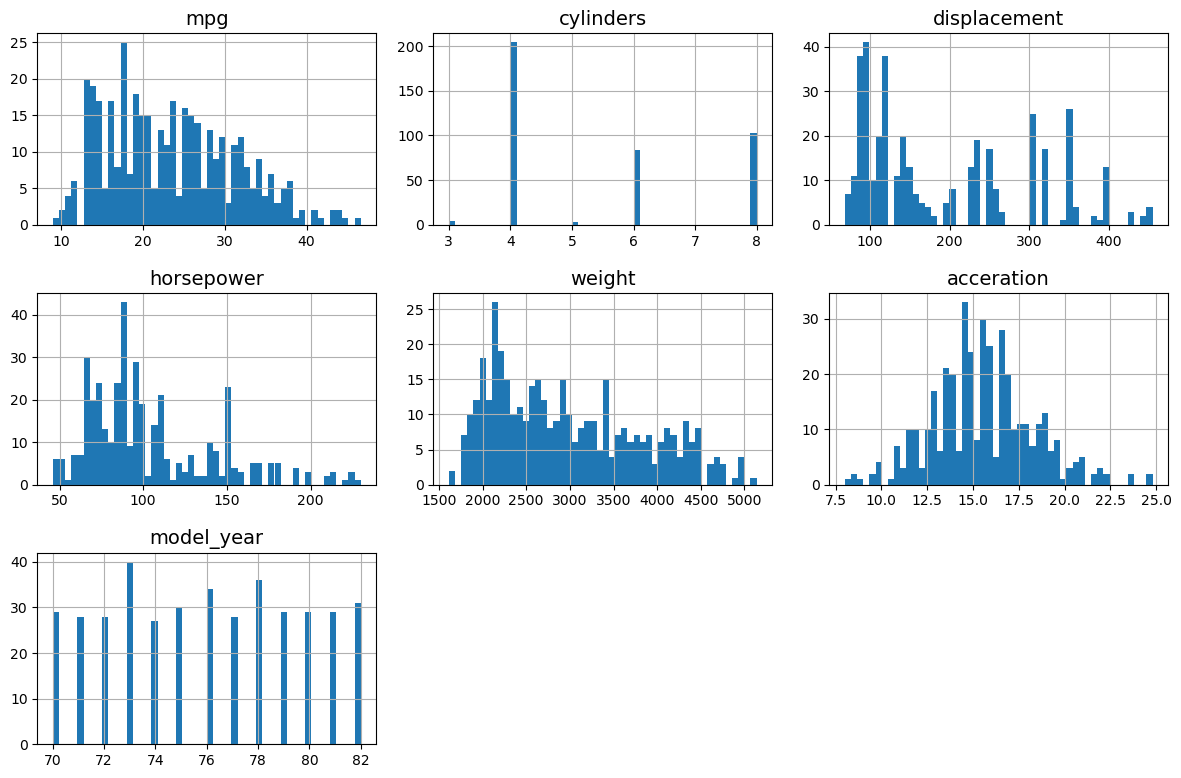

In [11]:
import matplotlib.pyplot as plt

# 추가코드 – 아래 5 라인은 기본 글꼴 크기등을 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mpg.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

**1.3 데이터 세트 만들기**

In [12]:
# 코드 2-2
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(mpg, 0.2)
len(train_set)

319

In [14]:
len(test_set)

79

In [15]:
np.random.seed(42)

In [16]:
# <코드 2-3>
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)

In [17]:
# <코드 2-4>
mpg["acceration_cat"] = pd.cut(mpg["acceration"],
                               bins=[7.5, 12, 14, 16.2, 19, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,acceration_cat
0,18.0,8,307.0,130.0,3504,12.0,70,USA,1
1,15.0,8,350.0,165.0,3693,11.5,70,USA,1
2,18.0,8,318.0,150.0,3436,11.0,70,USA,1
3,16.0,8,304.0,150.0,3433,12.0,70,USA,1
4,17.0,8,302.0,140.0,3449,10.5,70,USA,1


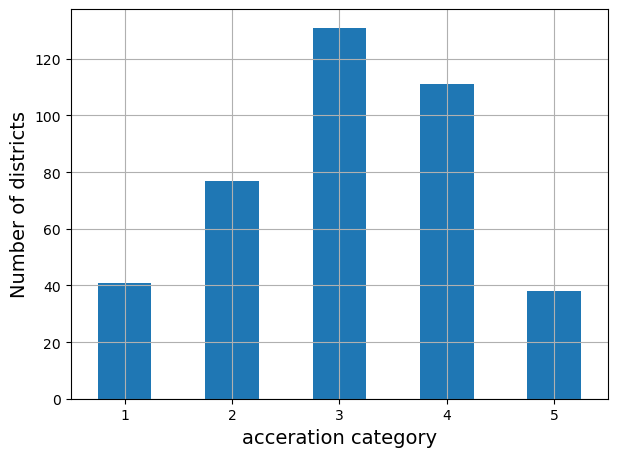

In [19]:
mpg["acceration_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("acceration category")
plt.ylabel("Number of districts")
save_fig("car_acceration_cat_bar_plot")  # extra code
plt.show()

In [20]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   mpg             398 non-null    float64 
 1   cylinders       398 non-null    int64   
 2   displacement    398 non-null    float64 
 3   horsepower      392 non-null    float64 
 4   weight          398 non-null    int64   
 5   acceration      398 non-null    float64 
 6   model_year      398 non-null    int64   
 7   origin          398 non-null    object  
 8   acceration_cat  398 non-null    category
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.6+ KB


In [21]:
# <코드 2-5>
strat_train_set, strat_test_set = train_test_split(
    mpg, test_size=0.2, stratify = mpg['acceration_cat'], random_state=42)

In [22]:
strat_train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,acceration_cat
359,28.1,4,141.0,80.0,3230,20.4,81,EU,5
109,21.0,4,140.0,72.0,2401,19.5,73,USA,5
125,20.0,6,198.0,95.0,3102,16.5,74,USA,4
304,37.3,4,91.0,69.0,2130,14.7,79,EU,3
381,36.0,4,107.0,75.0,2205,14.5,82,JPN,3


In [23]:
strat_test_set["acceration_cat"].value_counts() / len(strat_test_set)

3    0.325
4    0.275
2    0.200
1    0.100
5    0.100
Name: acceration_cat, dtype: float64

In [24]:
# 추가 코드 - 계층  샘플링과 순수한 무작위 샘플링의 편향 비교 
def acceration_cat_proportions(data):
    return data["acceration_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": acceration_cat_proportions(mpg),
    "Stratified %": acceration_cat_proportions(strat_test_set),
    "Random %": acceration_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,10.30,10.0,11.25,-2.93,9.21
2,19.35,20.0,22.50,3.38,16.30
3,32.91,32.5,32.50,-1.26,-1.26
4,27.89,27.5,27.50,-1.40,-1.40
5,9.55,10.0,6.25,4.74,-34.54


In [25]:
# <코드 2-6>
for set_ in (strat_train_set, strat_test_set):
    set_.drop("acceration_cat", axis=1, inplace=True)
    
mpg = strat_train_set.copy()

In [26]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
359,28.1,4,141.0,80.0,3230,20.4,81,EU
109,21.0,4,140.0,72.0,2401,19.5,73,USA
125,20.0,6,198.0,95.0,3102,16.5,74,USA
304,37.3,4,91.0,69.0,2130,14.7,79,EU
381,36.0,4,107.0,75.0,2205,14.5,82,JPN


**4주차 데이터 이해를 위한 탐색과 시각화**

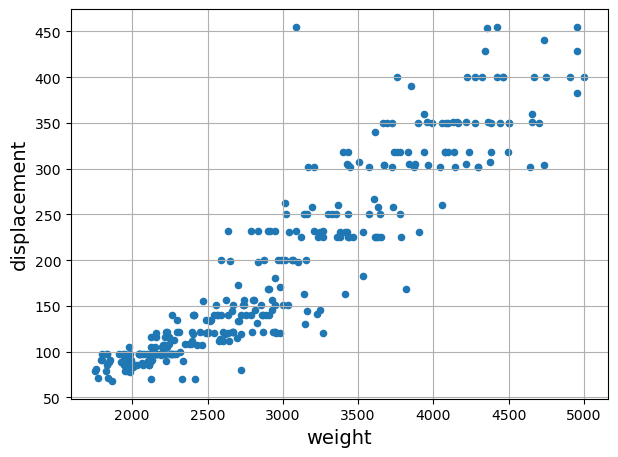

In [27]:
mpg.plot(kind="scatter", x="weight", y="displacement", grid=True)
save_fig("bad_visualization_plot")  # 그림 저장
plt.show()

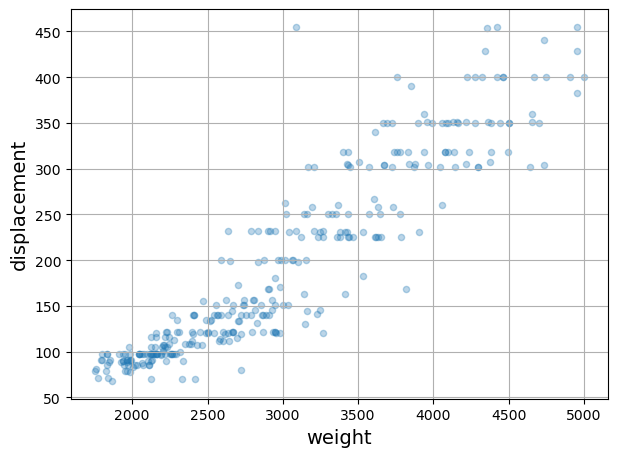

In [28]:
mpg.plot(kind="scatter", x="weight", y="displacement",grid=True, alpha=0.3)
save_fig("better_visualization_plot")  # 그림저장
plt.show()

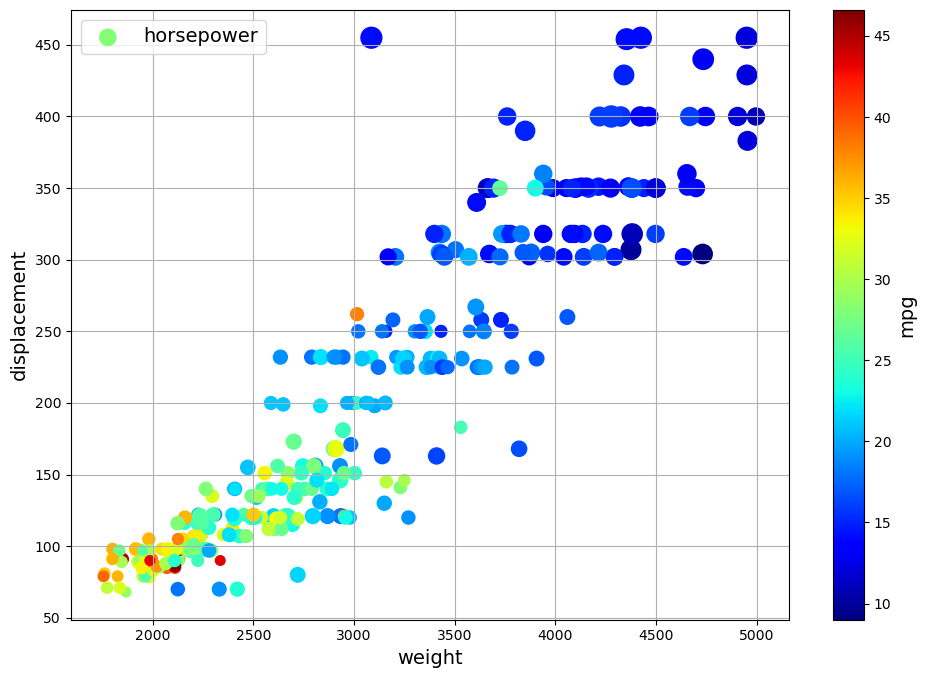

In [29]:
mpg.plot(kind="scatter", x="weight", y="displacement", grid=True,
         s=mpg["horsepower"], label="horsepower",
         c="mpg", cmap="jet", colorbar=True,
         legend=True, sharex=False, figsize=(10, 7))
save_fig("mpg_scatterplot")  # 그림 저장
plt.show()

**2. 상관 관계와 상관 계수**

In [30]:
#리스트에 데이터 삽입하기
model_year = mpg['model_year']
meter_per_gallen = mpg['mpg']

#리스트를 데이터프레임으로 변환하기
data = {'model_year':model_year, 'meter_per_gallen':meter_per_gallen}
df = pd.DataFrame(data)

#상관분석 수행하기
coef = df.corr(method='pearson')
print(coef)

                  model_year  meter_per_gallen
model_year          1.000000          0.588971
meter_per_gallen    0.588971          1.000000


In [31]:
#리스트에 데이터 삽입하기
weight = mpg['weight']
meter_per_gallen = mpg['mpg']

#리스트를 데이터프레임으로 변환하기
data = {'wieght':weight, 'meter_per_gallen':meter_per_gallen}
df = pd.DataFrame(data)

coef = df.corr(method='pearson')
print(coef)

                   wieght  meter_per_gallen
wieght            1.00000          -0.81868
meter_per_gallen -0.81868           1.00000


**3. 자동차 연비의 상관관계 조사**

In [32]:
corr_matrix = mpg.drop(columns=['origin']).corr()

In [33]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year
mpg,1.000000,-0.759901,-0.785561,-0.766687,-0.818680,0.418170,0.588971
cylinders,-0.759901,1.000000,0.949485,0.837608,0.889648,-0.514403,-0.353492
displacement,-0.785561,0.949485,1.000000,0.890761,0.925587,-0.549791,-0.377129
horsepower,-0.766687,0.837608,0.890761,1.000000,0.857378,-0.697758,-0.423858
weight,-0.818680,0.889648,0.925587,0.857378,1.000000,-0.421786,-0.308909
acceration,0.418170,-0.514403,-0.549791,-0.697758,-0.421786,1.000000,0.293419
model_year,0.588971,-0.353492,-0.377129,-0.423858,-0.308909,0.293419,1.000000


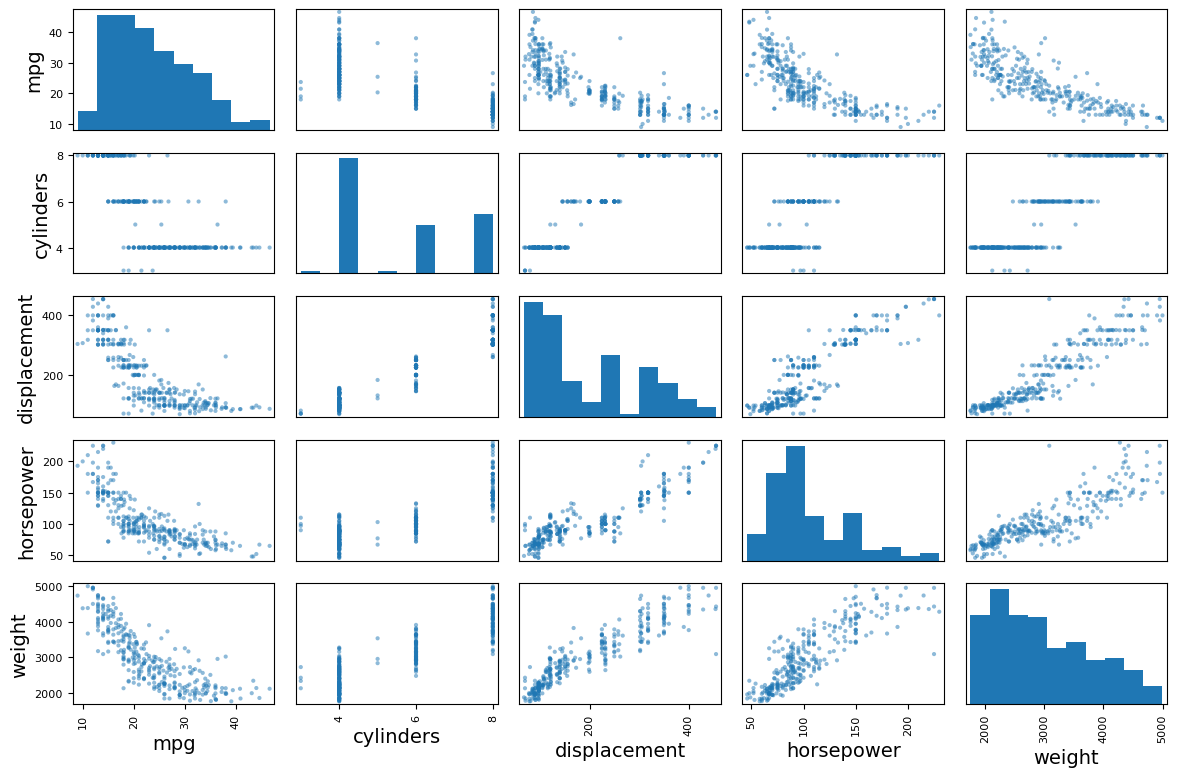

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "cylinders", "displacement",'horsepower',
              "weight"]
scatter_matrix(mpg[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [35]:
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.588971
acceration      0.418170
cylinders      -0.759901
horsepower     -0.766687
displacement   -0.785561
weight         -0.818680
Name: mpg, dtype: float64

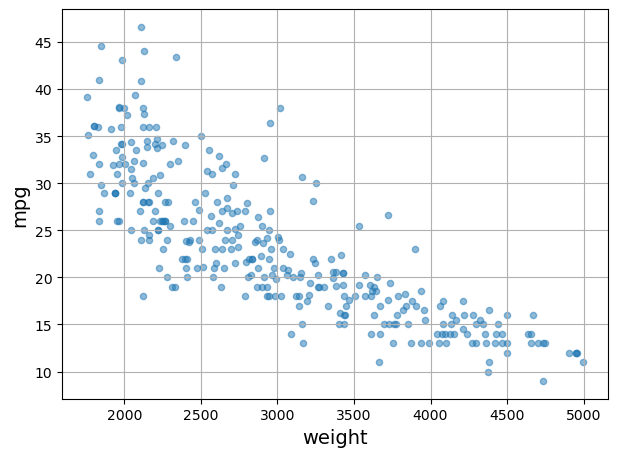

In [36]:
mpg.plot(kind="scatter", x="weight", y="mpg",
             alpha=0.5, grid=True)
save_fig("weight_vs_mpg_scatterplot")  # extra code
plt.show()

**4. 특성 조합으로 실험**

In [37]:
mpg["weight_per_cyl"] = mpg["weight"] / mpg["cylinders"]
mpg["weight_per_dis"] = mpg["weight"] / mpg["displacement"]
mpg["weight_per_year"] = mpg["weight"] / mpg["model_year"]

In [38]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,weight_per_cyl,weight_per_dis,weight_per_year
359,28.1,4,141.0,80.0,3230,20.4,81,EU,807.50,22.907801,39.876543
109,21.0,4,140.0,72.0,2401,19.5,73,USA,600.25,17.150000,32.890411
125,20.0,6,198.0,95.0,3102,16.5,74,USA,517.00,15.666667,41.918919
304,37.3,4,91.0,69.0,2130,14.7,79,EU,532.50,23.406593,26.962025
381,36.0,4,107.0,75.0,2205,14.5,82,JPN,551.25,20.607477,26.890244


In [39]:
corr_matrix = mpg.corr()
corr_matrix["mpg"].sort_values(ascending=False)

mpg                1.000000
weight_per_dis     0.665092
model_year         0.588971
acceration         0.418170
weight_per_cyl    -0.003951
cylinders         -0.759901
horsepower        -0.766687
displacement      -0.785561
weight            -0.818680
weight_per_year   -0.852407
Name: mpg, dtype: float64

**4~5주차 머신러닝 데이터 준비와 모델 선택**

**4 주차**

In [40]:
mpg = strat_train_set.drop("mpg", axis=1)
mpg_labels = strat_train_set["mpg"].copy()

**1. 데이터 정제(Data Cleaning)**

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [42]:
mpg_num = mpg.select_dtypes(include=[np.number])

In [43]:
mpg_num

,cylinders,displacement,horsepower,weight,acceration,model_year
359,4,141.0,80.0,3230,20.4,81
109,4,140.0,72.0,2401,19.5,73
125,6,198.0,95.0,3102,16.5,74
304,4,91.0,69.0,2130,14.7,79
381,4,107.0,75.0,2205,14.5,82
...,...,...,...,...,...,...
186,4,101.0,83.0,2202,15.3,76
27,8,318.0,210.0,4382,13.5,70
366,6,225.0,85.0,3465,16.6,81
199,6,225.0,100.0,3651,17.7,76


In [44]:
imputer.fit(mpg_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([   4. ,  151. ,   93.5, 2860. ,   15.5,   76. ])

Check that this is the same as manually computing the median of each attribute:

In [46]:
mpg_num.median().values

array([   4. ,  151. ,   93.5, 2860. ,   15.5,   76. ])

Transform the training set:

In [47]:
X = imputer.transform(mpg_num)
X.shape

(318, 6)

In [48]:
imputer.feature_names_in_

array(['cylinders', 'displacement', 'horsepower', 'weight', 'acceration',
       'model_year'], dtype=object)

In [49]:
mpg_tr = pd.DataFrame(X, columns=mpg_num.columns,
                          index=mpg_num.index)

In [50]:
mpg_tr

,cylinders,displacement,horsepower,weight,acceration,model_year
359,4.0,141.0,80.0,3230.0,20.4,81.0
109,4.0,140.0,72.0,2401.0,19.5,73.0
125,6.0,198.0,95.0,3102.0,16.5,74.0
304,4.0,91.0,69.0,2130.0,14.7,79.0
381,4.0,107.0,75.0,2205.0,14.5,82.0
...,...,...,...,...,...,...
186,4.0,101.0,83.0,2202.0,15.3,76.0
27,8.0,318.0,210.0,4382.0,13.5,70.0
366,6.0,225.0,85.0,3465.0,16.6,81.0
199,6.0,225.0,100.0,3651.0,17.7,76.0


In [51]:
imputer.strategy

'median'

In [52]:
null_rows = df.isna().any(axis=1)
null_rows_idx = df.index[null_rows].tolist()

In [53]:
mpg_tr.loc[null_rows_idx].head()  

,cylinders,displacement,horsepower,weight,acceration,model_year


**2. 텍스트와 범주형 특성**

Now let's preprocess the categorical input feature, `origin`:

In [54]:
mpg_cat = mpg[["origin"]]
mpg_cat.head(8)

,origin
359,EU
109,USA
125,USA
304,EU
381,JPN
281,USA
247,JPN
197,EU


In [55]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
mpg_cat_encoded = ordinal_encoder.fit_transform(mpg_cat)

In [56]:
mpg_cat_encoded[:8]

array([[0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.]])

In [57]:
ordinal_encoder.categories_

[array(['EU', 'JPN', 'USA'], dtype=object)]

In [58]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
mpg_cat_1hot = cat_encoder.fit_transform(mpg_cat)

In [59]:
mpg_cat_1hot

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [60]:
mpg_cat_1hot.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [61]:
cat_encoder = OneHotEncoder(sparse=False)
mpg_cat_1hot = cat_encoder.fit_transform(mpg_cat)
mpg_cat_1hot

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [62]:
cat_encoder.categories_

[array(['EU', 'JPN', 'USA'], dtype=object)]

In [63]:
df_test = pd.DataFrame({"origin": ["USA", "EU"]})
df_test

,origin
0,USA
1,EU


In [64]:
pd.get_dummies(df_test)

,origin_EU,origin_USA
0,0,1
1,1,0


In [65]:
cat_encoder.transform(df_test)

array([[0., 0., 1.],
       [1., 0., 0.]])

In [66]:
df_test_unknown = pd.DataFrame({"origin": ["USA", "EU"]})
pd.get_dummies(df_test_unknown)

,origin_EU,origin_USA
0,0,1
1,1,0


In [67]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 1.],
       [1., 0., 0.]])

In [68]:
cat_encoder.feature_names_in_

array(['origin'], dtype=object)

In [69]:
cat_encoder.get_feature_names_out()

array(['origin_EU', 'origin_JPN', 'origin_USA'], dtype=object)

In [70]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [71]:
df_output

,origin_EU,origin_JPN,origin_USA
0,0.0,0.0,1.0
1,1.0,0.0,0.0


**3. 특성 스케일링(Feature Scaling)**

In [72]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
mpg_num_min_max_scaled = min_max_scaler.fit_transform(mpg_num)

In [73]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
mpg_num_std_scaled = std_scaler.fit_transform(mpg_num)

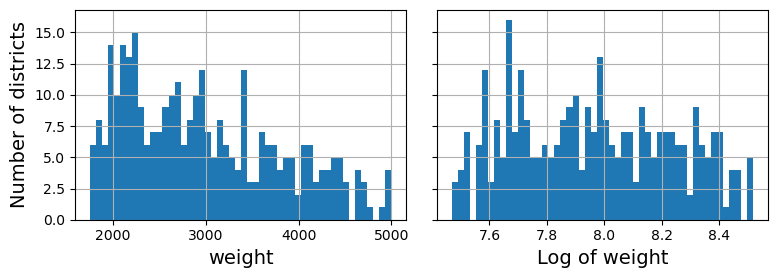

In [74]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
mpg["weight"].hist(ax=axs[0], bins=50)
mpg["weight"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("weight")
axs[1].set_xlabel("Log of weight")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

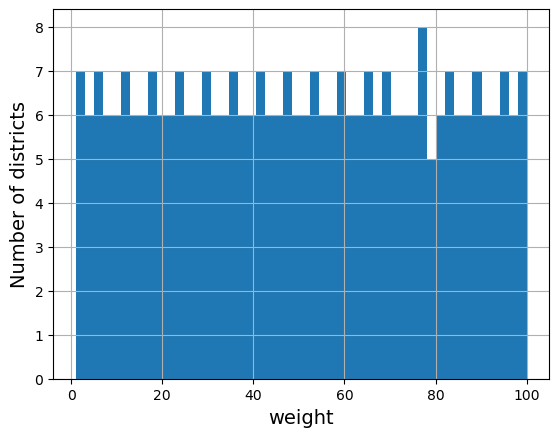

In [75]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(mpg["weight"], p)
               for p in range(1, 100)]
flattened_weight = pd.cut(mpg["weight"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_weight.hist(bins=50)
plt.xlabel("weight")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [76]:
from sklearn.metrics.pairwise import rbf_kernel

dis_simil_100 = rbf_kernel(mpg[["displacement"]], [[100]], gamma=0.1)

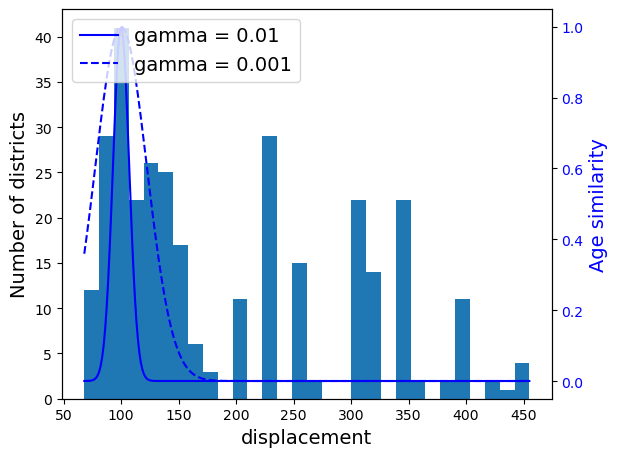

In [77]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(mpg["displacement"].min(),
                   mpg["displacement"].max(),
                   300).reshape(-1, 1)
gamma1 = 0.01
gamma2 = 0.001
rbf1 = rbf_kernel(ages, [[100]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[100]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("displacement")
ax1.set_ylabel("Number of districts")
ax1.hist(mpg["displacement"], bins=30)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.01")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.001", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(mpg_labels.to_frame())

model = LinearRegression()
model.fit(mpg[["weight"]], scaled_labels)
some_new_data = mpg[["weight"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [79]:
some_new_data

,weight
359,3230
109,2401
125,3102
304,2130
381,2205


In [80]:
predictions

array([[21.47330909],
       [27.74177421],
       [22.44117825],
       [29.7909347 ],
       [29.22382387]])

In [81]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(mpg[["weight"]], mpg_labels)
predictions = model.predict(some_new_data)

In [82]:
predictions

array([21.47330909, 27.74177421, 22.44117825, 29.7909347 , 29.22382387])

In [83]:
mpg_labels.head()

359    28.1
109    21.0
125    20.0
304    37.3
381    36.0
Name: mpg, dtype: float64

**5주차**

**4. 사용자 정의 변환기**

In [83]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(mpg[["displacement"]])

In [84]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[100.]], gamma=0.001))
dis_simil_100 = rbf_transformer.transform(mpg[["displacement"]])

In [85]:
dis_simil_100

array([[1.86187695e-01],
       [2.01896518e-01],
       [6.74583627e-05],
       [9.22193691e-01],
       [9.52181130e-01],
       [4.53999298e-05],
       [7.98516219e-01],
       [9.04837418e-01],
       [1.01893226e-03],
       [9.38005000e-01],
       [6.70320046e-01],
       [3.52429615e-08],
       [6.43392707e-01],
       [2.29397691e-21],
       [4.34562758e-02],
       [9.80688278e-48],
       [1.90128823e-18],
       [7.41993418e-02],
       [9.22193691e-01],
       [7.74141969e-01],
       [6.43392707e-01],
       [3.52429615e-08],
       [2.01896518e-01],
       [6.43392707e-01],
       [9.93769491e-01],
       [8.44113490e-19],
       [1.69189792e-10],
       [2.29397691e-21],
       [7.41993418e-02],
       [4.34562758e-02],
       [3.82510184e-01],
       [1.90128823e-18],
       [9.75309912e-01],
       [9.04837418e-01],
       [9.91040379e-01],
       [4.53999298e-05],
       [7.41993418e-02],
       [4.84891651e-03],
       [2.70927411e-08],
       [7.18778174e-28],


In [86]:
sf_coords = 100, 2200
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.001))
sf_simil = sf_transformer.transform(mpg[["displacement", "weight"]])

In [87]:
sf_simil

array([[0.00000000e+000],
       [5.74377562e-019],
       [0.00000000e+000],
       [6.86719193e-003],
       [9.28671694e-001],
       [4.11025745e-276],
       [3.65348221e-008],
       [8.25763216e-031],
       [0.00000000e+000],
       [1.23810885e-001],
       [0.00000000e+000],
       [0.00000000e+000],
       [5.81006934e-242],
       [0.00000000e+000],
       [4.19454581e-162],
       [0.00000000e+000],
       [0.00000000e+000],
       [1.17335629e-304],
       [7.75460572e-021],
       [1.32655465e-001],
       [2.92973437e-234],
       [0.00000000e+000],
       [3.27953571e-020],
       [3.29480763e-245],
       [4.15995925e-003],
       [0.00000000e+000],
       [3.13391549e-303],
       [0.00000000e+000],
       [3.52541261e-188],
       [4.38262203e-131],
       [1.62615948e-173],
       [0.00000000e+000],
       [3.96531419e-001],
       [3.26335328e-003],
       [4.34294544e-030],
       [2.03045938e-291],
       [3.66827571e-126],
       [1.29426805e-111],
       [0.00

In [88]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [89]:
# <코드 4-6>
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [90]:
# <코드 4-7>
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=5, gamma=0.01, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [91]:
cluster_simil = ClusterSimilarity(n_clusters=5, gamma=0.001, random_state=42)
similarities = cluster_simil.fit_transform(mpg[["displacement", "weight"]],
                                           sample_weight=mpg_labels)

In [92]:
similarities[:3].round(2)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

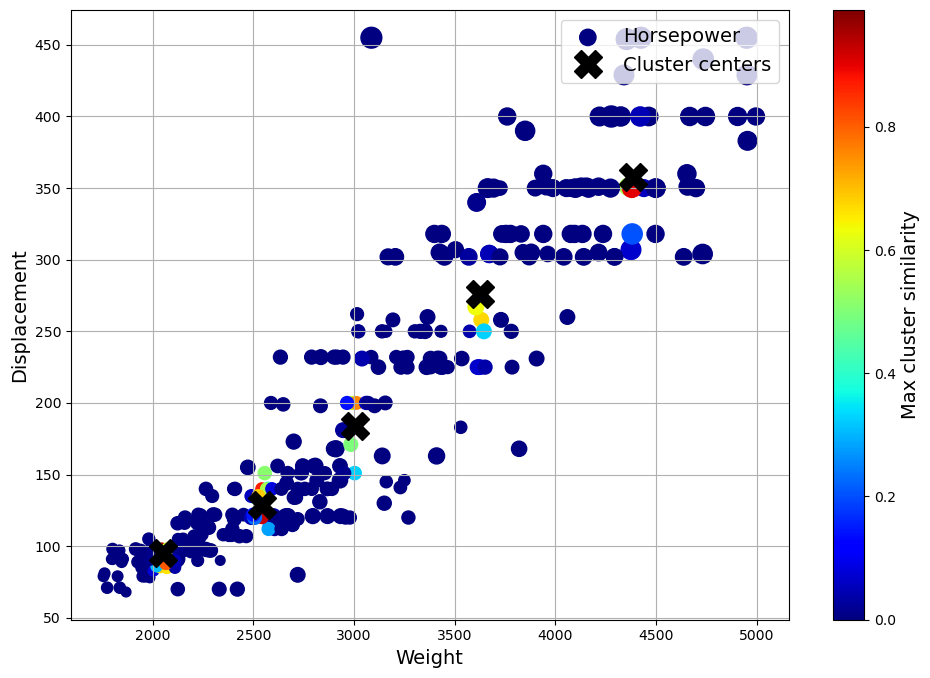

In [93]:
# <코드 4-8>
mpg_renamed = mpg.rename(columns={
    "weight": "Weight", "displacement": "Displacement",
    "horsepower": "Horsepower",
    "mpg": "MPG(meter per Gallen)"})
mpg_renamed["Max cluster similarity"] = similarities.max(axis=1)

mpg_renamed.plot(kind="scatter", x="Weight", y="Displacement", grid=True,
                     s=mpg_renamed["Horsepower"], label="Horsepower",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()